# Customer Churn Data Science Project

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

## Preparations

We will first import a few libraries and our data. We will be using pandas and scikit learn for this project.

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

# Import data
df = pd.read_csv("data.csv")

## Data Cleaning

In [ ]:
# Check missing values
df.isna().sum(axis=0)

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Delete blanks before and after the column name
df.columns = df.columns.str.strip()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
# Create
Categorical_Columns = ["Tenure", "Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited", "Complain", "Satisfaction Score", "Card Type"]
Categorical_Variables = df[Categorical_Columns]
Numerical_Columns = [col for col in df.columns if col not in Categorical_Columns]
Numerical_Variables = df[Numerical_Columns]
Numerical_Variables["Tenure"] = df["Tenure"]
unique_value = {c: sorted(list(df[c].unique())) for c in Categorical_Variables.columns}
pprint(unique_value)

{'Card Type': ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'],
 'Complain': [0, 1],
 'Exited': [0, 1],
 'Gender': ['Female', 'Male'],
 'Geography': ['France', 'Germany', 'Spain'],
 'HasCrCard': [0, 1],
 'IsActiveMember': [0, 1],
 'NumOfProducts': [1, 2, 3, 4],
 'Satisfaction Score': [1, 2, 3, 4, 5],
 'Tenure': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


<ipython-input-78-3ef23d03bb4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numerical_Variables["Tenure"] = df["Tenure"]


In [ ]:
pprint(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [ ]:
Numerical_Variables

,RowNumber,CustomerId,Surname,CreditScore,Age,Balance,EstimatedSalary,Point Earned,Tenure
0,1,15634602,Hargrave,619,42,0.00,101348.88,464,2
1,2,15647311,Hill,608,41,83807.86,112542.58,456,1
2,3,15619304,Onio,502,42,159660.80,113931.57,377,8
3,4,15701354,Boni,699,39,0.00,93826.63,350,1
4,5,15737888,Mitchell,850,43,125510.82,79084.10,425,2
...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,0.00,96270.64,300,5
9996,9997,15569892,Johnstone,516,35,57369.61,101699.77,771,10
9997,9998,15584532,Liu,709,36,0.00,42085.58,564,7
9998,9999,15682355,Sabbatini,772,42,75075.31,92888.52,339,3


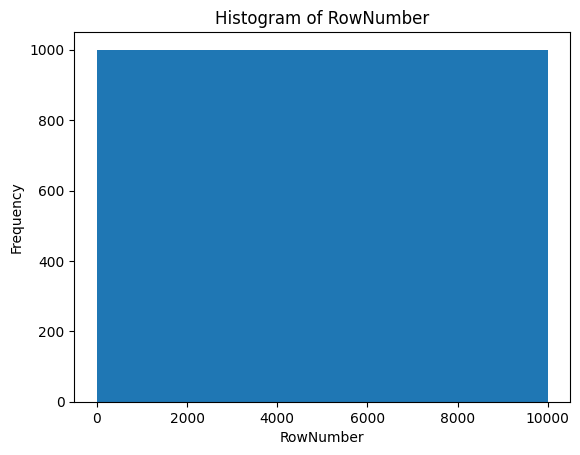

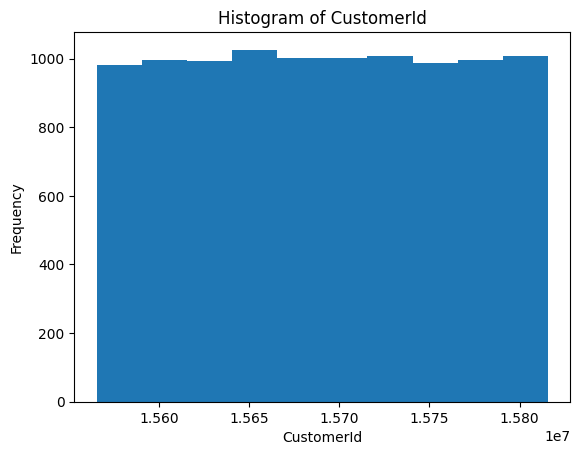

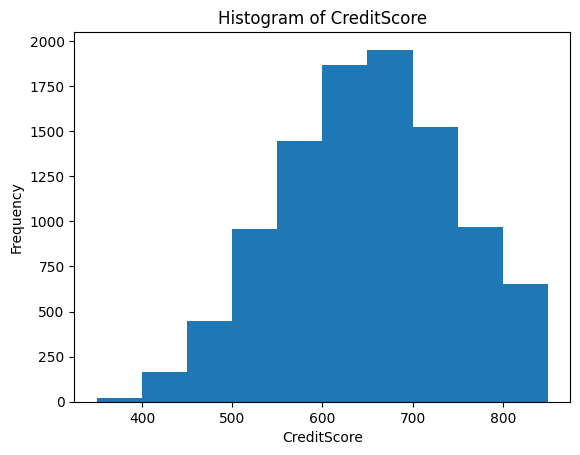

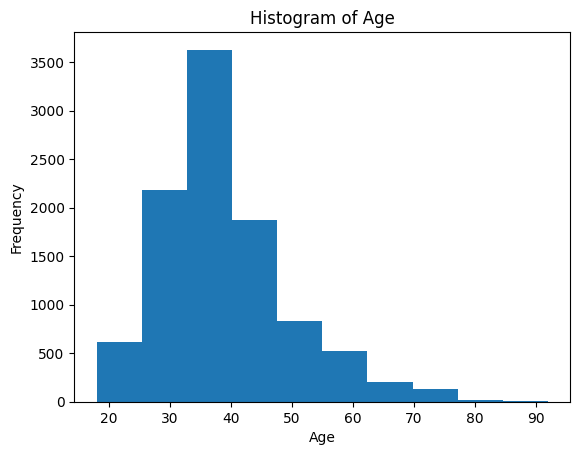

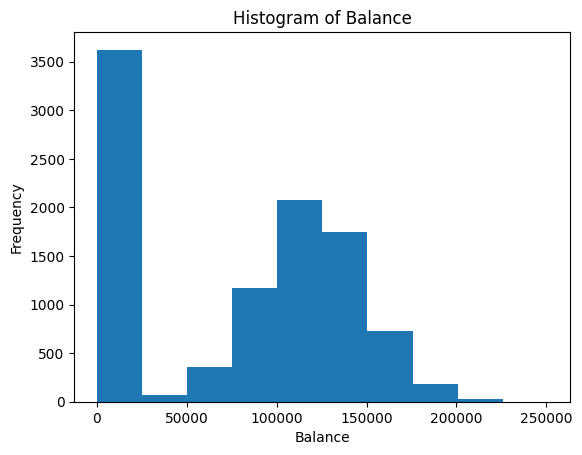

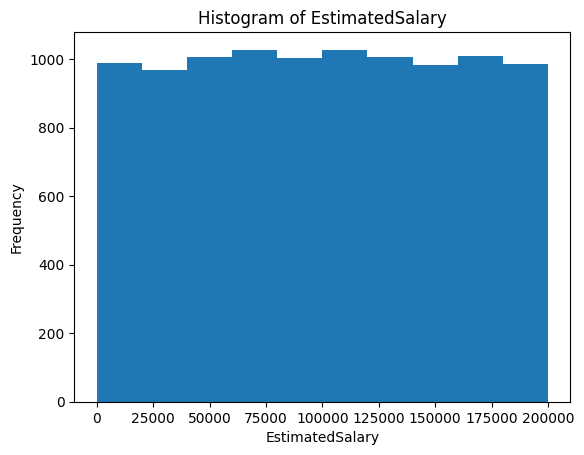

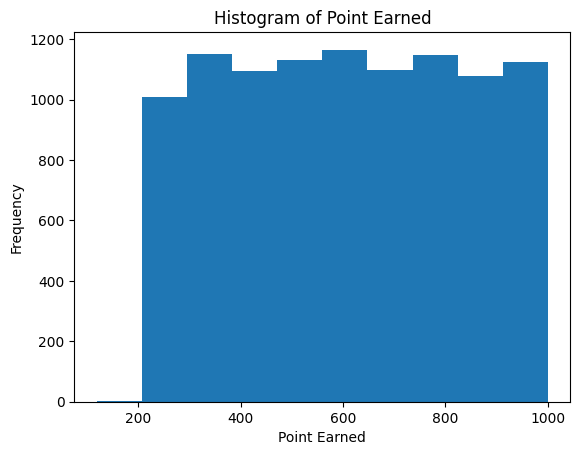

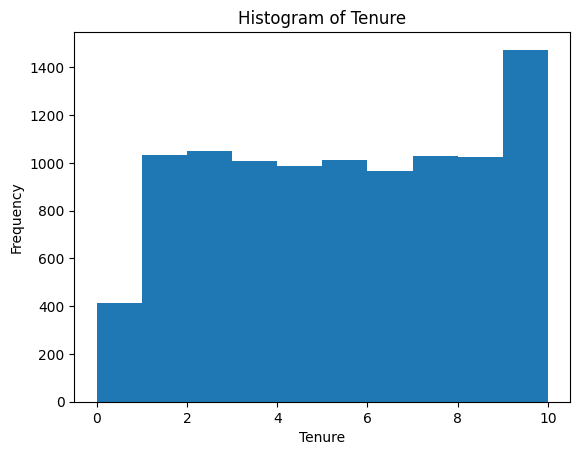

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create histograms for each numerical column
for col in Numerical_Variables.select_dtypes(include=['number']):
    plt.figure()  # Create a new figure for each histogram
    plt.hist(Numerical_Variables[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
